<a href="https://colab.research.google.com/github/sharon-kurant/backprop_from_scratch/blob/main/homework1_313596082.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Course: Assignment #1 

Submitted by:

 **Student 1 Name+ID

 **Student 2 Name+ID

**Assignment Instruction:**

· Submissions in pairs only.

· The code must be written in Python 3.7+

· You are allowed to use only Pytorch, numpy and matplotlib as external libraries

· The code must be reasonably documented

· You should save a copy of the notebook to your Drive and answer all the questions inside the notebook, at the designated cells. Only the notebook will be submitted in moodle (in `.ipynb` format).

· If you wish to work in your IDE, make a `.py` copy of the notebook, but as you finish insert the script back to the matching cells of the notebook.

**Important:** All plots, results and outputs should be included in the notebook as the cells' outputs (run all cells and do not clear the output).


In [1]:
%matplotlib inline
import torch
import numpy as np

## Question 1:  Multidimentional XOR and backpropagation


Given $ d $ bits $b=(b_1, b_2, ... , b_d) \in \{0, 1\}^d$, we define $$XOR(b) = Σ_{i=1}^db_i\ mod\ 2$$

You will train a feedforward neural network to model the multidimentional XOR problem.

The following function returns the labeled XOR "dataset" for any given $d$ (`dim`)

In [2]:
import itertools

def XORData(dim):
  X = np.array(list(itertools.product([0, 1], repeat=dim)))
  Y = X.sum(axis=1)%2
  return X, Y

Implement the following:

1. A linear layer class:`Linear(torch.nn.Module)`\
• You shold inherit from `torch.nn.Module`\
• You can not use `torch.nn.LinearLayer` or any other model implemented by PyTorch, only tensors. Wrap every tensor object with `torch.nn.Parameter` (for the optimizer).\
• Use `torch.randn` to initialize the parameter tensors (weights matrix and biases vector)\
• Implement the `forward` method according to the linear model $y = Wx + b$\
• The number of parameters should be defined by `in_features` and `out_features` \
• Make sure to enable gradient computation!

In [3]:
import torch.nn as nn

class Linear(nn.Module):
  def __init__(self, in_features, out_features):
    # Implement here
    super(Linear, self).__init__()
    self.weights = torch.nn.Parameter(torch.randn(size=(in_features,out_features)))
    self.bias = torch.nn.Parameter(torch.randn(out_features))
  def forward(self, x):
    # Implement here
    return torch.add(torch.matmul(x, self.weights),self.bias)

In [4]:
Linear(5,3).forward(torch.Tensor([1,2,3,4,5]))

tensor([  6.9230, -14.9908,   9.6588], grad_fn=<AddBackward0>)

2. A feedforward neural network:`FFNet(torch.nn.module)`\
• Use the `Linear` class you implemented to construct a network with `in_features` input size, `out_features` output size, and one hidden layer with `hidden_size` neurons.\
• Use the sigmoid activation function on top of the hidden layer neurons.\
• The XOR example we saw in class should help you.

In [5]:
class FFNet(nn.Module):
  def __init__(self, in_features, out_features, hidden_size):
    # Implement here
    super(FFNet, self).__init__()
    self.l1 = Linear(in_features, hidden_size)
    self.l2 = Linear(hidden_size, out_features)
  def forward(self, x):
    # Implement here
    x = self.l1.forward(x)
    x = torch.sigmoid(x)
    x = self.l2.forward(x)
    return x

In [6]:
model = FFNet(3,2,2)
model.forward(torch.Tensor([2,3,4]))

tensor([ 0.9262, -1.5844], grad_fn=<AddBackward0>)

### Exploring the hidden layer
In class we talked about the **Universal Approximation Theorem**. The following question will help us to understand how hard is finding the optimal weight that the theorem talks about.

You are given a basic training function.

In [7]:
import numpy as np
import torch.optim as optim

loss_func = nn.MSELoss()
#optimizer = optim.SGD(model.parameters(), lr=0.02, momentum=0.9)

def train(net, X, Y, epochs=3000):
  steps = X.shape[0]
  for i in range(epochs):
      for j in range(steps):
          data_point = np.random.randint((X.shape[0]))
          x_var = torch.Tensor(X[data_point])
          y_var = torch.Tensor([Y[data_point]])        
          optimizer.zero_grad()
          y_hat = net(x_var)
          loss = loss_func(y_hat, y_var)
          loss.backward()
          optimizer.step()
      if(i % 100 == 0):
          print("Epoch:{}, Loss:{}".format(i, loss.detach()))

Using the above, for each of the dimentions: $d = 2, 3, 4, 5$:
1. Create the corresponding dataset using `XORData`
2. Create models with different hidden layer sizes($1, 2, 3, ..., d,d+const, const*d,...$ etc.) and an optimizer for it using: `optimizer = optim.SGD(model.parameters(), lr=0.02, momentum=0.9)
`
3. Try to train the different networks on the dataset.

Make sure to create a new `FFNet` and optimizer objects each time you call `train`.


In [8]:
# Implement here
### Implement here
constant = 2
optimizer = optim.SGD(model.parameters(), lr=0.02, momentum=0.9)

for d in range(1,5):
  print(f"\nFor d = {d}")
  X, Y = XORData(d)
  X, Y = torch.Tensor(X), torch.Tensor(Y)
  print(f"\nFFNet parameters: {d,2,d+constant}")
  model = FFNet(d,2,d+constant)
  train(model, X, Y, 500)
  print(f"\nFFNet parameters: {d,2,d*constant}")
  model = FFNet(d,2,d*constant)
  train(model, X, Y, 500)
  print(f"\nFFNet parameters: {d,2,d+1}")
  model = FFNet(d,2,d+1)
  train(model, X, Y, 500)


For d = 1

FFNet parameters: (1, 2, 3)
Epoch:0, Loss:0.30629104375839233


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch:100, Loss:1.9638705253601074
Epoch:200, Loss:0.30629104375839233
Epoch:300, Loss:1.9638705253601074
Epoch:400, Loss:1.9638705253601074

FFNet parameters: (1, 2, 2)
Epoch:0, Loss:0.1778753697872162
Epoch:100, Loss:0.1778753697872162
Epoch:200, Loss:0.6073590517044067
Epoch:300, Loss:0.1778753697872162
Epoch:400, Loss:0.1778753697872162

FFNet parameters: (1, 2, 2)
Epoch:0, Loss:0.46284937858581543
Epoch:100, Loss:0.9943267703056335
Epoch:200, Loss:0.9943267703056335
Epoch:300, Loss:0.9943267703056335
Epoch:400, Loss:0.46284937858581543

For d = 2

FFNet parameters: (2, 2, 4)
Epoch:0, Loss:13.742598533630371
Epoch:100, Loss:7.453109264373779
Epoch:200, Loss:13.742598533630371
Epoch:300, Loss:4.266692161560059
Epoch:400, Loss:4.266692161560059

FFNet parameters: (2, 2, 4)
Epoch:0, Loss:0.2980652153491974
Epoch:100, Loss:1.1372003555297852
Epoch:200, Loss:1.1372003555297852
Epoch:300, Loss:0.2980652153491974
Epoch:400, Loss:1.1372003555297852

FFNet parameters: (2, 2, 3)
Epoch:0, Los

For which dimensions you were able to reach a model that converges (loss value is geting close to 0)?\
What is the number of hidden neurons in that network and how did you find it?\
What results did you expect and how does it differ from the results you achieved?


**Answers:**


### Backpropagation

The following part will focus on the computaion of gradients w.r.t the model parameters, to understand what is happening behind `loss.backward()`.

Implement the function:`calc_gradients(net, x, loss)`:

Input: instance of `FFNet` with a hidden layer of size 2, input of size 2 and output of size 1, input vector `x` and `loss` value.

Output: One dimensional tensor with the gradients of the loss w.r.t each of the parameters, ordered as the corresponding parameters order `net.parameters()` returns (if we would flatten it's output). 

1. Comute(by hand) the derivatives w.r.t the second linear layer parameters
2. Use the chain rule to comute(by hand) the derivatives w.r.t the first linear layer parameters
3. Implement the final form computations per parameter.
4. Order the gradients as described above

Practical number 4 slides 26-28 should be helpful.

In [21]:
def calc_gradients(net, x, y_hat, y_var, loss):
  #y = y_hat - (loss**.5)
  y = y_var
  w1_1, w1_2, w1_3, w1_4 = net.l1.weights.flatten()
  b1_1, b1_2 = net.l1.bias.flatten()

  w2_1, w2_2 = net.l2.weights.flatten()
  
  z1 = torch.sigmoid(w1_1 * x[0] + w1_3 * x[1] +b1_1)
  z2 = torch.sigmoid(w1_2 * x[0] + w1_4 * x[1] +b1_2)

  # z = torch.sigmoid(torch.matmul(w, torch.t(x))+torch.t(b))

  L_d = 2 * (y_hat - y)
  z1_d = z1 * (1-z1)
  z2_d = z2 * (1-z2)

  dL_w2_1 = L_d * z1
  dL_w2_2 = L_d * z2

  dL_w1_1 = L_d * w2_1 * z1_d * x[0]
  dL_w1_2 = L_d * w2_2 * z2_d * x[0]

  dL_w1_3 = L_d * w2_1 * z1_d * x[1]
  dL_w1_4 = L_d * w2_2 * z2_d * x[1]

  dL_b1_1 = L_d * w2_1 * z1_d
  dL_b1_2 = L_d * w2_2 * z2_d

  dL_b2 = L_d

  return torch.tensor([dL_w1_1, dL_w1_2, dL_w1_3, dL_w1_4, dL_b1_1, dL_b1_2, dL_w2_1, dL_w2_2, dL_b2])

Run the following cell to check the correctness of your computation:

In [22]:
def equal_gradients(net, x, y_hat, y_var, loss):
  grads = []
  for param in net.parameters():
    grads.append(param.grad.view(-1))
  grads = torch.cat(grads)
  return True if torch.sum(grads.round(decimals =4) - calc_gradients(net, x, y_hat, y_var, loss).round(decimals =4)) == 0 else False

def train_and_compare(net, X, Y, epochs=100):
  steps = X.shape[0]
  for i in range(epochs):
      for j in range(steps):
          data_point = np.random.randint(X.shape[0])
          x_var = torch.Tensor(X[data_point])
          y_var = torch.Tensor([Y[data_point]])        
          optimizer.zero_grad()
          y_hat = net(x_var)
          loss = loss_func(y_hat, y_var)
          loss.backward()
          if not equal_gradients(net, x_var, y_hat, y_var, loss.item()):
            print("Wrong gradients computation!")
            return
          optimizer.step()
  print("Correct gradients computation!")

model = FFNet(2, 1, 2)
optimizer = optim.SGD(model.parameters(), lr=0.02, momentum=0.9)
X, Y = XORData(2)


train_and_compare(model, X, Y)

Correct gradients computation!


### Question 2: Solving Fashion-MNIST

In class we've learned about MNIST data set, which can be loaded from torchvision.datasets.
We built a feedforward network for MNIST classification with accuracy of ~96%.
In this assignment we will use Fashion-MNIST, which is also a built-in dataset in Pytorch. We'll
try different networks and find which one fits better.

The code must run on GPU.

In [23]:
import torch
import torchvision
import torchvision.datasets as datasets
from torchvision import transforms
from torch.utils.data.sampler import SubsetRandomSampler

# Use .to(device) when needed to train on GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

### Add any additional functions here

Please implement the following modules and functions:
1. Function 1: `load_dataset()`\
Load the Fashion-MNIST training and test set from Pytorch. Split the training set to
training and validation set (80%-20% ratio). Define a DataLoader for each set. In the
DataLoader parameters use "batch_size"=64.


In [24]:
### Implement here
def load_dataset(p = 0.2):
  normalize = transforms.Normalize((0.2859,), (0.3530,))
  totensor = transforms.ToTensor()
  mnist_transforms = transforms.Compose([totensor, normalize])

  mnist_trainset = datasets.FashionMNIST(root='../data', train=True, download=True, transform=mnist_transforms)
  mnist_testset = datasets.FashionMNIST(root='../data', train=False, download=True, transform=mnist_transforms)

  indices = list(range(len(mnist_trainset)))
  np.random.shuffle(indices)

  split = int(np.floor(p * len(mnist_trainset)))
  train_sample = SubsetRandomSampler(indices[split:])
  val_sample = SubsetRandomSampler(indices[:split])
  
  train_loader = torch.utils.data.DataLoader(mnist_trainset, sampler = train_sample, batch_size=64)
  val_loader = torch.utils.data.DataLoader(mnist_trainset, sampler = val_sample, batch_size=64)
  test_loader = torch.utils.data.DataLoader(mnist_testset, batch_size=64, shuffle=False)

  print('train set len', len(train_loader.sampler.indices))
  print('validation set len', len(val_loader.sampler.indices))
  print('test set len', len(test_loader.dataset))
  
  return train_loader, val_loader, test_loader

In [25]:
train_loader, val_loader, test_loader = load_dataset()

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw

train set len 48000
validation set len 12000
test set len 10000


img size torch.Size([1, 28, 28])
label tensor(9)


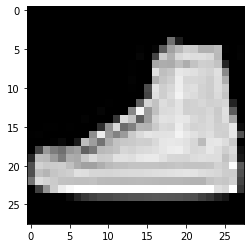

In [26]:
import matplotlib.pyplot as plt

image, label = next(iter(train_loader))
print('img size', image[0].size())
print('label', label[0])
plt.imshow(image[0].reshape(28,28), cmap="gray")

2. Function 2: `one_hidden_layer_no_activation(number_of_neurons)`\
For this function, you should implement the following steps:\
• Define the model: feed-forward network with one hidden layer, no activation
functions are applied on the hidden layer (linear). The number of neurons in the
hidden layer is given by the parameter “number_of_neurons”. The output layer
activation function is log softmax (recall what should be the dim of the output
layer as we learned in class).\
• Train the network on the Fashion-MNIST training set for 50 epochs\
• Use [cross entropy](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) as a cost function\
• Use the optimizer:\
learning_rate = 0.01\
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)\
• Plot a figure with the accuracy on the training set and validation set for each
epoch\
• Plot the accuracy on the test set of the final model

In [74]:
import torch.nn as nn

In [48]:
class ohlna(nn.Module):
  def __init__(self):
    super(ohlna, self).__init__()
    self.fc = nn.Linear(28*28, 10)
  def forward(self, x):
    x = self.fc(x)
    return x

In [43]:
### Implement here
def o1ne_hidden_layer_no_activation(number_of_neurons):
  
  model = ohlna(number_of_neurons)

  lr = 0.01
  optimizer = torch.optim.SGD(model.parameters(),lr=lr)
  loss_fn = nn.CrossEntropyLoss()

  epochs = 50
  losses = []
  for i in range(epochs):
    losses_batch = []
    for j,(data,label) in enumerate(train_loader):   
        optimizer.zero_grad()
        #flatten the image to vector of size 28*28
        data = data.view(-1,28*28)
        #calculate output    
        y_hat = model(data) 
        #calculate loss
        loss = loss_fn(y_hat,label)  
        #backprop    
        loss.backward()
        optimizer.step()
        losses_batch.append(loss.detach())
    losses.append(np.mean(losses_batch))       
    print("epoch {} | train loss : {} ".format(i,losses[i]))
  return losses

In [126]:
def one_hidden_layer_no_activation(number_of_neurons):
  
  model = ohlna()

  if torch.cuda.is_available():
    model = model.cuda()

  # Declaring Criterion and Optimizer
  loss_fn = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)
  
  # Training with Validation
  epochs = 5
  train_loss_list = []
  val_loss_list = []
  train_accuracy_list = []
  val_accuracy_list = []

  for e in range(epochs):
    train_loss = 0.0
    train_accuracy = 0.0
    for data, labels in train_loader:
      # Transfer Data to GPU if available
      data = data.view(-1,28*28)

      if torch.cuda.is_available():
          data, labels = data.cuda(), labels.cuda()
      
      # Clear the gradients
      optimizer.zero_grad()
      # Forward Pass
      target = model(data)
      # Find the Loss
      loss = loss_fn(target,labels)
      # Calculate gradients
      loss.backward()
      # Update Weights
      optimizer.step()
      # Calculate Loss
      train_loss += loss.item()
      train_accuracy += torch.sum(labels == target.argmax(axis=1)).item()

    val_loss = 0.0
    val_accuracy = 0.0
    model.eval()     # Optional when not using Model Specific layer
    for data, labels in val_loader:

      data = data.view(-1,28*28)
      # Transfer Data to GPU if available
      
      if torch.cuda.is_available():
          data, labels = data.cuda(), labels.cuda()
      
      # Forward Pass
      target = model(data)
      # Find the Loss
      loss = loss_fn(target,labels)
      # Calculate Loss
      val_loss += loss.item()
      val_accuracy += torch.sum(labels == target.argmax(axis=1)).item()

    
    train_accuracy_list.append(train_accuracy / len(train_loader))
    val_accuracy_list.append(val_accuracy / len(val_loader))
    
    train_loss_list.append(train_loss / len(train_loader))
    val_loss_list.append(val_loss / len(val_loader))
    print(f'Epoch {e+1} \n\t|\t Training Loss: {train_loss_list[e]} \t|\t Validation Loss: {val_loss_list[e]} \n\t|\t Training Acc: {train_accuracy_list[e]} \t|\t Validation Acc: {val_accuracy_list[e]}')
  return train_loss_list, val_loss_list, train_accuracy_list, val_accuracy_list

In [127]:
train_loss_list, val_loss_list, train_accuracy_list, val_accuracy_list = one_hidden_layer_no_activation(28*28)

Epoch 1 
	|	 Training Loss: 0.629507317741712 	|	 Validation Loss: 0.5229690054312666 
	|	 Training Acc: 50.396 	|	 Validation Acc: 52.441489361702125
Epoch 2 
	|	 Training Loss: 0.4889903545975685 	|	 Validation Loss: 0.4952084021048343 
	|	 Training Acc: 53.21066666666667 	|	 Validation Acc: 52.808510638297875
Epoch 3 
	|	 Training Loss: 0.4617635397911072 	|	 Validation Loss: 0.47309185263324294 
	|	 Training Acc: 53.824 	|	 Validation Acc: 53.32446808510638
Epoch 4 
	|	 Training Loss: 0.44672957209746045 	|	 Validation Loss: 0.45944132243699215 
	|	 Training Acc: 54.157333333333334 	|	 Validation Acc: 53.70744680851064
Epoch 5 
	|	 Training Loss: 0.43715957627693813 	|	 Validation Loss: 0.4521420403046811 
	|	 Training Acc: 54.48533333333334 	|	 Validation Acc: 53.920212765957444


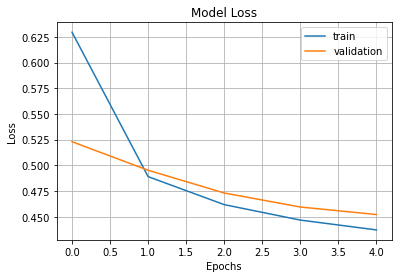

In [128]:
plt.plot(train_loss_list)
plt.plot(val_loss_list)
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

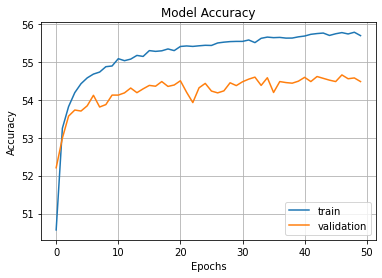

In [129]:
plt.plot(train_accuracy_list0)
plt.plot(val_accuracy_list0)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

3. Function 3: `two_hidden_layers_sigmoid(number_of_neurons)`\
• Same as Function 2, with 2 hidden layers\
• Use sigmoid as activation function\
• Train for 20 epochs with lr = 0.1\
• Plot a figure with the accuracy on the training set and validation set for each
epoch\
• Plot the accuracy on the test set of the final model


In [ ]:
### Implement here

4. Function 4: `two_hidden_layers_relu(number_of_neurons)`\
• Same as Function 2, with 2 hidden layers\
• Use relu as activation function\
• Train for 20 epochs\
• Train the network with different learning rates, plot a figure with the validation
accuracy for each learning rate you tried\
• Use the learning rate that yields the best accuracy on the validation set and
report the accuracy on the test set\
• Plot a figure with the accuracy on the training set and validation set for each
epoch\
• Plot the accuracy on the test set of the final model

In [ ]:
### Implement here

5. Function 5: `two_hidden_layers_relu_SGD_decreasing_lr(number_of_neurons)`\
• Same as Function 4\
• Use lr = 0.01\
• Use decreasing learning rate\
• Plot a figure with the accuracy on the training set and validation set for each
epoch\
• Plot the accuracy on the test set of the final model\


In [ ]:
### Implement here

6. Function 6: `two_hidden_layers_relu_adam(number_of_neurons)`\
• Same as Function 4\
• Use Adam as optimizer with lr=0.001\
• Train for 30 epochs\
• Plot a figure with the accuracy on the training set and validation set for each
epoch\
• Plot the accuracy on the test set of the final model


In [ ]:
### Implement here

7. Function 7: `four_hidden_layers_adam(number_of_neurons)`\
• Same as Function 6, but use 4 hidden layers instead of 2\
• Train for 30 epochs\
• Use Adam as optimizer\
• Plot a figure with the accuracy on the training set and validation set for each
epoch\
• Plot the accuracy on the test set of the final model


In [ ]:
### Implement here

8. Function 8: `four_hidden_layers_adam_weight_decay(number_of_neurons)`\
• Same as Function 6, but use 4 hidden layers instead of 2\
• Use only 10% of the training set for training\
• Train for 250 epochs\
• Use Adam as optimizer with weight decay as regularization method\
• Plot a figure of the training and validation loss function during the training
process. Write in your report what's the difference between training with and
without weight decay? Based your answer on the plots.\
• Plot a figure with the accuracy on the training set and validation set for each
epoch\
• Plot the accuracy on the test set of the final model


In [ ]:
### Implement here

9. Function 9: `four_hidden_layers_adam_early_stopping(number_of_neurons)`\
• Same as Function 6, but use 4 hidden layers instead of 2\
• Use Adam as optimizer\
• Use only 10% of the training set for training\
• Train for 250 epochs\
• Use early stopping regularization (on the validation set) to prevent overfitting with
patience=20.\
• Plot a figure of the training and validation loss function during the training
process. Show on your figure the early stopping point.\
• Plot a figure with the accuracy on the training set and validation set for each
epoch\
• Plot the accuracy on the test set of the final model

In [ ]:
### Implement here

Run the following commands:

In [ ]:
load_dataset()
# 4 neurons per layer
number_of_neurons = 4
one_hidden_layer_no_activation(number_of_neurons)
two_hidden_layers_sigmoid(number_of_neurons)
two_hidden_layers_relu(number_of_neurons)
two_hidden_layers_relu_adam(number_of_neurons)
# 32 neurons per layer
number_of_neurons = 32
one_hidden_layer_no_activation(number_of_neurons)
two_hidden_layers_sigmoid(number_of_neurons)
two_hidden_layers_relu(number_of_neurons)
two_hidden_layers_relu_adam(number_of_neurons)
four_hidden_layers_adam(number_of_neurons)


After implementing, running and getting the results Answer the following below:
1. The networks sorted according to their test results from the worst to the best.
2. Give intuitive explanation why we got such order after sorting.
3. Is there any difference between the test and the training accuracy? Why?
4. Don't forget to keep all the function plots in the notebook

Answers: